# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 4: Web Scraping Job Postings

## Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal has two main objectives:

   1. Determine the industry factors that are most important in predicting the salary amounts for these data.
   2. Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries. 

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer these two questions.

---

## Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to answer the two questions described above.

### QUESTION 1: Factors that impact salary

To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).

You have learned a variety of new skills and models that may be useful for this problem:
- NLP
- Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
- Ensemble methods and decision tree models
- SVM models

Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.

### QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.


### BONUS PROBLEM

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.

---

## Requirements

1. Scrape and prepare your own data.

2. **Create and compare at least two models for each section**. One of the two models should be a decision tree or ensemble model. The other can be a classifier or regression of your choosing (e.g. Ridge, logistic regression, KNN, SVM, etc).
   - Section 1: Job Salary Trends
   - Section 2: Job Category Factors

3. Prepare a polished Jupyter Notebook with your analysis for a peer audience of data scientists. 
   - Make sure to clearly describe and label each section.
   - Comment on your code so that others could, in theory, replicate your work.

4. A brief writeup in an executive summary, written for a non-technical audience.
   - Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

#### BONUS

5. Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions.

6. Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

---

## Suggestions for Getting Started

1. Collect data from [Indeed.com](www.indeed.com) (or another aggregator) on data-related jobs to use in predicting salary trends for your analysis.
  - Select and parse data from *at least 1000 postings* for jobs, potentially from multiple location searches.
2. Find out what factors most directly impact salaries (e.g. title, location, department, etc).
  - Test, validate, and describe your models. What factors predict salary category? How do your models perform?
3. Discover which features have the greatest importance when determining a low vs. high paying job.
  - Your Boss is interested in what overall features hold the greatest significance.
  - HR is interested in which SKILLS and KEY WORDS hold the greatest significance.   
4. Author an executive summary that details the highlights of your analysis for a non-technical audience.
5. If tackling the bonus question, try framing the salary problem as a classification problem detecting low vs. high salary positions.

---

## Useful Resources

- Scraping is one of the most fun, useful and interesting skills out there. Don’t lose out by copying someone else's code!
- [Here is some advice on how to write for a non-technical audience](http://programmers.stackexchange.com/questions/11523/explaining-technical-things-to-non-technical-people)
- [Documentation for BeautifulSoup can be found here](http://www.crummy.com/software/BeautifulSoup/).

---

### Project Feedback + Evaluation

For all projects, students will be evaluated on a simple 3 point scale (0, 1, or 2). Instructors will use this rubric when scoring student performance on each of the core project **requirements:** 

Score | Expectations
----- | ------------
**0** | _Does not meet expectations. Try again._
**1** | _Meets expectations. Good job._
**2** | _Surpasses expectations. Brilliant!_

[For more information on how we grade our DSI projects, see our project grading walkthrough.](https://git.generalassemb.ly/dsi-projects/readme/blob/master/README.md)


# Question 1

The data that below was scraped from https://www.mycareersfuture.sg/ using <b>Selenium</b> and <b>BeautifulSoup</b>. Job posting searches include keywords such as 'Data Analyst', 'Data Scientist' and other data science / machine learning related roles.

In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
careers = './jobs_df_22jul.csv'

In [3]:
jobs = pd.read_csv(careers)

## EDA

In [4]:
# replacing all 'NONE' values to np.nan

jobs.replace('NONE', np.nan, inplace=True)

In [5]:
jobs.shape

(1549, 10)

In [6]:
jobs.head(2)

,Unnamed: 0,Company,Title,Address,Emp_type,Seniority,Industry,Salary,Responsibility,Requirements
0,0,NTT DATA SINGAPORE PTE. LTD.,Senior Application Developer,"KEPPEL TOWERS, 10 HOE CHIANG ROAD 089315",Contract,"Executive, Senior Executive",Information Technology,"$8,000to$110,000","Roles & Responsibilities Creating complex, en...",Requirements A Bachelor’s degree in Computer S...
1,1,HP PPS ASIA PACIFIC PTE. LTD.,Business Analyst,1 DEPOT CLOSE 109841,"Permanent, Full Time",Professional,Others,"$8,400to$12,900",Roles & ResponsibilitiesHP is the world’s lead...,RequirementsEducation and Experience Required:...


In [7]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 10 columns):
Unnamed: 0        1549 non-null int64
Company           1549 non-null object
Title             1549 non-null object
Address           1208 non-null object
Emp_type          1549 non-null object
Seniority         1513 non-null object
Industry          1549 non-null object
Salary            1395 non-null object
Responsibility    1549 non-null object
Requirements      1482 non-null object
dtypes: int64(1), object(9)
memory usage: 121.1+ KB


In [8]:
# Address and Unnamed: 0 columns should not affect the analysis

jobs.drop(['Address', 'Unnamed: 0'], axis=1, inplace=True)

In [9]:
jobs.isnull().sum().sort_values(ascending=False)

Salary            154
Requirements       67
Seniority          36
Responsibility      0
Industry            0
Emp_type            0
Title               0
Company             0
dtype: int64

In [12]:
duplicates = jobs.loc[jobs.duplicated(), :]
print ("Initial df shape: ", jobs.shape)
print ('Duplicate shape: ', duplicates.shape)
jobs.drop(duplicates.index, inplace=True)
print ('No duplicates df shape: ', jobs.shape)

Initial df shape:  (1549, 8)
Duplicate shape:  (52, 8)
No duplicates df shape:  (1497, 8)


In [13]:
# removing NONE values
jobs.dropna(how='all', inplace=True)

In [14]:
jobs.shape

(1497, 8)

In [15]:
# renaming values in Seniority column

jobs.Seniority = jobs.Seniority.apply(lambda x: str(x))

In [16]:
jobs.loc[41]['Responsibility']

'Roles & ResponsibilitiesBe part of the Consumer Insights and Analytics team (CIA) supporting our digital analytics effort for different business units. Key responsibilities include:  Delivering digital audience insights derived from our digital advertising stack, data management platform and other web analytics tools Delivering key metrics/benchmarks via our business intelligence platform Conducting custom analyses and studies to support business decision makers Integrating digital data from disparate sources, including partnering with Consumer Insights to communicate actionable findings for ongoing business requirements Designing and improving data collection approaches and analytical deliverables '

In [17]:
# does not make sense to be permanent and contract at the same time.
# re-arranging/standardizing some of the Emp_type: Contract, Part Time vs Part Time, Contract

jobs['Emp_type'] = jobs['Emp_type'].apply(lambda x: 'Permanent' if x == 'Permanent, Contract' else x)

# Temp == Contract
jobs['Emp_type'] = jobs['Emp_type'].apply(lambda x: 'Contract, Full Time' if x == 'Temporary, Contract, Full Time' else x)

jobs['Emp_type'] = jobs['Emp_type'].apply(lambda x: 'Contract, Part Time' if x == 'Part Time, Temporary' else x)
jobs['Emp_type'] = jobs['Emp_type'].apply(lambda x: 'Contract' if x == 'Temporary, Contract' else x)
jobs['Emp_type'] = jobs['Emp_type'].apply(lambda x: 'Contract' if x == 'Temporary' else x)
jobs['Emp_type'] = jobs['Emp_type'].apply(lambda x: 'Contract, Part Time' if x == 'Part Time, Contract' else x)
jobs['Emp_type'] = jobs['Emp_type'].apply(lambda x: 'Part Time' if x == 'Part Time, Flexi work' else x)
jobs['Emp_type'] = jobs['Emp_type'].apply(lambda x: 'Part Time' if x == 'Flexi work' else x)


jobs['Emp_type'] = jobs['Emp_type'].apply(lambda x: 'Contract, Full Time' if x == 'Temporary, Full Time' else x)
jobs['Emp_type'] = jobs['Emp_type'].apply(lambda x: 'Permanent, Full Time' if x == 'Permanent' else x)


# categorizing as others for Emp_type that are not making sense or cannot categorize correctly
jobs['Emp_type'] = jobs['Emp_type'].apply(lambda x: 'Others' if x == 'Part Time, Temporary, Contract, Full Time, Flexi work'
                                          or x == 'Part Time, Permanent, Temporary, Full Time'
                                          or x == 'Permanent, Contract, Freelance, Full Time'
                                          or x == 'Permanent, Contract, Freelance, Flexi work'
                                          or x == 'Contract, Freelance, Full Time, Flexi work'
                                          or x == 'Permanent, Contract, Full Time'
                                          else x)

In [18]:
jobs.Emp_type.value_counts()

Permanent, Full Time                                                 620
Full Time                                                            483
Contract                                                             204
Contract, Full Time                                                  153
Others                                                                22
Part Time                                                              9
Contract, Part Time                                                    3
Internship                                                             2
Part Time, Permanent, Temporary, Contract, Flexi work, Internship      1
Name: Emp_type, dtype: int64

In [19]:
# dropping Emp_type == Internship. We will not include internship in our analysis and modelling.

jobs.drop(jobs[jobs['Emp_type'] == 'Internship'].index, inplace=True)

In [20]:
# checking Responsibility column before cleaning

jobs.Responsibility[0]

'Roles & Responsibilities \xa0Creating complex, enterprise-transforming applications on diverse, high energy teams\xa0 Working with the latest tools and techniques\xa0 Hands-on coding, usually in a pair programming environment\xa0 Working in highly collaborative teams and building quality code\xa0 Knowledge in lots of different domains and client environments\xa0 Furnish the business domain deeply and working closely with business stakeholders\xa0 '

In [22]:
# cleaning Responsibility column

jobs.Responsibility = jobs['Responsibility'].apply(lambda x: x.replace('\r', '').replace('\n', ' ')
                                                   .replace('roles', '').replace('responsibilities', '')
                                                   .replace('role', '').replace('responsibility', '')
                                                   .replace('Roles', '').replace('Responsibilities', '')
                                                   .replace('Role', '').replace('Responsibility', '')
                                                   .encode('ascii', errors='ignore'))
jobs.Responsibility[0]

b' &  Creating complex, enterprise-transforming applications on diverse, high energy teams Working with the latest tools and techniques Hands-on coding, usually in a pair programming environment Working in highly collaborative teams and building quality code Knowledge in lots of different domains and client environments Furnish the business domain deeply and working closely with business stakeholders '

In [23]:
# checking Requirements column before cleaning

jobs.Requirements[33]

'RequirementsRequirements: ·\xa0\xa0 \xa0Strong design sense and communication skills – able to articulate design concepts or ideas ·\xa0\xa0 \xa0Proficient in Adobe CS6, knowledge of web design and 3D software is a bonus\xa0 ·\xa0\xa0 \xa0Excellent in time management, organization and prioritization skills ·\xa0\xa0 \xa0Ability to multi-task in a fast paced environment whilst maintaining strict attention to details ·\xa0\xa0 \xa0Able to work independently ·\xa0\xa0 \xa0Excellent team player with the ability to manage stakeholders effectively ·\xa0\xa0 \xa0Knowledge in print production, on-site QC for press-checks and ability to prep FA ·\xa0\xa0 \xa0A bachelor’s Degree/ Diploma in Graphic Design, Visual Communications, or a related field is required ·\xa0\xa0 \xa0Knowledge on UI/UX\xa0 ·\xa0\xa0 \xa0A minimum of 4 years experience would be favourable'

In [24]:
# cleaning Requirements column

jobs.Requirements = jobs['Requirements'].apply(lambda x: x.replace('\r', '').replace('\n', ' ')
                                        .encode('ascii', errors='ignore') if type(x) is str else x)
jobs.Requirements[2]

b'RequirementsRequirements:   Minimum B.S. degree in Computer Science or a related technical field Excellent communication skills with the ability to identify and communicate data driven insights 2+ years of Python development and Unix/linux system experience 2+ years of SQL (Mysql, Mssql, Hive, etc)experience You must also possess at least 2 of the additional requirements as below 2+ years of working experience in software development/programming in one of Java, C/C++. OS environment: Linux/Unix 2+ years of working experience with distributed databases or distributed systems 2+ years of working experience with dimensional data modelling & schema design in Data Warehouses 2+ years of working experience working on BigData analytics pipelines (Hadoop, Hive, ETL, RDBMS-Hadoop data management tools like Sqoop)     '

In [61]:
jobs.columns

Index(['Company', 'Title', 'Emp_type', 'Seniority', 'Industry',
       'Responsibility', 'Requirements', 'Avg_sal', 'Avg_sal_percentile',
       'sal_cat'],
      dtype='object')

In [64]:
jobs.Title = jobs['Title'].apply(lambda x: x.replace('\r', '').replace('\n', ' ')
                                        .encode('ascii', errors='ignore') if type(x) is str else x)

In [25]:
# cleaning Salary column

jobs.Salary.replace('NONE', np.nan, inplace=True)

jobs.Salary = jobs['Salary'].apply(lambda x: x.replace('$', '').replace(',', '').split('to') if type(x) is str else x)



The Salary column is filled up as an object with min and max salary. I will be splitting the min and max salary to 2 columns and taking the average of the 2 for each row. Rows that have null values will be grouped and on seniority and will be replaced with the median salary of the seniority category.

Additionally, I will look at the min and max salary in my dataset to ensure there are no outliers. If there are, I will have to re-calculate the salary amount (perhaps it was quoted differently, compared to the rest. Monthly vs Yearly).

In [26]:
sal = jobs.Salary.apply(pd.Series).add_prefix('salary_')
jobs = pd.concat([jobs, sal], axis=1)

jobs.salary_0 = jobs.salary_0.apply(lambda x: float(x))
jobs.salary_1 = jobs.salary_1.apply(lambda x: float(x))
jobs['avg_sal'] = (jobs.salary_0 + jobs.salary_1) / 2
jobs.head()

jobs.drop(['Salary', 'salary_0', 'salary_1'], axis=1, inplace=True)

In [28]:
print ('Min Salary: ', jobs.avg_sal.min())
print ('Max Salary: ', jobs.avg_sal.max())

# will need to remove the min salary and investigate why is max salary at $300,000

Min Salary:  1.0
Max Salary:  300000.0


In [29]:
jobs[jobs['avg_sal'] == 1]

,Company,Title,Emp_type,Seniority,Industry,Responsibility,Requirements,avg_sal
1029,SGTech,information technology,"Part Time, Permanent, Temporary, Contract, Fle...","Manager, Fresh/entry level, Executive, Junior ...","Engineering, Information Technology, Others, S...",b' & TalentGuru(www.talentguru.org) is a skill...,"b'RequirementsFor more details, visit talentgu...",1.0


In [30]:
jobs[jobs['avg_sal'] < 1000]

,Company,Title,Emp_type,Seniority,Industry,Responsibility,Requirements,avg_sal
176,NATIONAL UNIVERSITY OF SINGAPORE,Data Recorder (National Adult Oral Health Survey),"Contract, Part Time",Non-executive,General Work,"b' & The Faculty of Dentistry, National Univer...",b'RequirementsThe Data Recorders shall have c...,10.0
1029,SGTech,information technology,"Part Time, Permanent, Temporary, Contract, Fle...","Manager, Fresh/entry level, Executive, Junior ...","Engineering, Information Technology, Others, S...",b' & TalentGuru(www.talentguru.org) is a skill...,"b'RequirementsFor more details, visit talentgu...",1.0


In [31]:
# dropping salary outlier since it is the only job in Seniority - 'Manager, Fresh/entry level, Executive, Junior Executive'

min_outlier = jobs[jobs['avg_sal'] < 1000]
jobs.drop(min_outlier.index, inplace=True)

In [32]:
# checking for duplicates again

duplicates1 = jobs.loc[jobs.duplicated(), :]
print ("Initial df shape: ", jobs.shape)
print ('Duplicate shape: ', duplicates1.shape)
jobs.drop(duplicates1.index, inplace=True)
print ('No duplicates df shape: ', jobs.shape)

Initial df shape:  (1493, 8)
Duplicate shape:  (1, 8)
No duplicates df shape:  (1492, 8)


In [33]:
jobs[['Seniority', 'Requirements']] = jobs[['Seniority', 'Requirements']].fillna('Not listed', axis=1)

In [34]:
# getting median salary for all seniority groups

seniority_median_sal = jobs.groupby('Seniority')['avg_sal'].median()
seniority_median_sal_df = seniority_median_sal.to_frame().reset_index()
seniority_median_sal_df.columns = ['Seniority', 'avg_sal_by_sen']
seniority_median_sal_df.sort_values('Seniority', ascending=True)

,Seniority,avg_sal_by_sen
0,Executive,5500.00
1,"Executive, Junior Executive",3400.00
2,"Executive, Junior Executive, Senior Executive",4975.00
3,"Executive, Non-executive",10000.00
4,"Executive, Non-executive, Junior Executive",3930.50
5,"Executive, Non-executive, Junior Executive, Se...",5350.00
6,"Executive, Senior Executive",5500.00
7,Fresh/entry level,4000.00
8,"Fresh/entry level, Executive",4000.00
9,"Fresh/entry level, Executive, Non-executive",4750.00


In [35]:
jobs.reset_index(inplace=True)

In [36]:
# fill NAs for avg_sal column in jobs DF based on Seniority col. NAs would be replaced by mean salary from seniority groups Df

temp_df = jobs.set_index('Seniority').avg_sal.fillna(seniority_median_sal_df.set_index('Seniority').avg_sal_by_sen).reset_index()
temp_df.columns = ['Seniority_1', 'Avg_sal']
jobs = pd.concat([jobs, temp_df], axis=1)
jobs.drop(['Seniority_1', 'avg_sal', 'index'], axis=1, inplace=True)

In [37]:
# check again for null values

jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 8 columns):
Company           1492 non-null object
Title             1492 non-null object
Emp_type          1492 non-null object
Seniority         1492 non-null object
Industry          1492 non-null object
Responsibility    1492 non-null object
Requirements      1492 non-null object
Avg_sal           1491 non-null float64
dtypes: float64(1), object(7)
memory usage: 93.3+ KB


In [38]:
jobs[jobs['Avg_sal'].isnull()]

,Company,Title,Emp_type,Seniority,Industry,Responsibility,Requirements,Avg_sal
527,SINGAPORE TECHNOLOGIES ENGINEERING LTD,Data Scientist,"Permanent, Full Time","Senior Management, Middle Management, Manager,...",Sciences / Laboratory / R&D,b' & Job Description: - Work in Strategic Tech...,"b""RequirementsRequirements: - Prefer a Master'...",NaN


In [39]:
# dropping row 513. No similar seniority or industry and emp_type having avg_sal

jobs.drop(527, inplace=True)

In [40]:
jobs.shape

(1491, 8)

In [42]:
import scipy.stats as stats

print ('Average Salary: ', jobs.Avg_sal.mean())
print ('Median Salary: ', jobs.Avg_sal.median())
print ('Salary Std Dev: ', jobs.Avg_sal.std())

jobs['Avg_sal_percentile'] = [stats.percentileofscore(jobs['Avg_sal'], num) for num in jobs['Avg_sal']]

Average Salary:  9222.702380952382
Median Salary:  6500.0
Salary Std Dev:  17396.317833859954


In [43]:
sal_std = jobs.Avg_sal.std()
sal_median = jobs.Avg_sal.median()
upper_limit = sal_median + sal_std
lower_limit = sal_median - sal_std

In [44]:
# these salaries could be quoted on per annum instead of per month. They will have to be converted to per month salaries.

outliers = jobs[(jobs.Avg_sal >  upper_limit) | (jobs.Avg_sal < lower_limit)]
outliers.sort_values('Avg_sal', ascending=True)

,Company,Title,Emp_type,Seniority,Industry,Responsibility,Requirements,Avg_sal,Avg_sal_percentile
1414,INTERSOFTKK (SINGAPORE) PTE. LTD.,Business Analyst,Part Time,Senior Executive,Information Technology,b' & Description Application Developer (Backe...,b'RequirementsTechnical Skills Required Techni...,32000.0,97.920858
1401,NTT DATA SINGAPORE PTE. LTD.,Full Stack Developer,Contract,"Professional, Executive, Senior Executive",Information Technology,b' & Work closely with scrum master and the r...,b'Requirements Bachelor Degree with min 3 year...,42500.0,97.987928
1215,OBSERVATIONAL AND PRAGMATIC RESEARCH INSTITUTE...,Research Project Manager,"Permanent, Full Time",Manager,Healthcare / Pharmaceutical,"b' & Our team, based in the UK and Singapore, ...",b'RequirementsEssential skills & experience: ...,54500.0,98.054997
1250,EPAM SYSTEMS PTE. LTD.,Senior Business Analyst,"Permanent, Full Time",Senior Executive,Information Technology,b' & Key in driving and supporting migratio...,b'Requirements Degree (and above) in Informati...,58500.0,98.122066
0,NTT DATA SINGAPORE PTE. LTD.,Senior Application Developer,Contract,"Executive, Senior Executive",Information Technology,"b' & Creating complex, enterprise-transformin...",b'Requirements A Bachelors degree in Computer ...,59000.0,98.189135
580,VISA WORLDWIDE PTE. LIMITED,"Analyst, Visa Consulting and Analytics","Permanent, Full Time",Fresh/entry level,"Consulting , Others","b"" & Are you skilled at turning hard numbers i...","b""RequirementsQualifications We are looking fo...",65000.0,98.256204
1313,ROBERT WALTERS (SINGAPORE) PTE LTD,Data Steward,"Permanent, Full Time",Senior Executive,Information Technology,b' & A global buyside firm has a job opportuni...,"b""RequirementsTo succeed in the Data Steward j...",70000.0,98.356808
483,UBS AG,Database Analyst,Full Time,Executive,Banking and Finance,"b"" & Are you curious? Do you love data? Are yo...",b'RequirementsYou have - hands on data prepara...,70000.0,98.356808
1474,SYNGENTA ASIA PACIFIC PTE. LTD.,Regional Planner,Full Time,Manager,Manufacturing,b' & Regional Planner APAC Singapore About Syn...,b'RequirementsWe are looking for: At least 3-...,72500.0,98.457411
1354,ILLUMINA SINGAPORE PTE. LTD.,"SAP Senior Business Solution Analyst, Logistic...",Full Time,Senior Executive,Others,b' & This functions as a Senior Analyst and i...,b'RequirementsPreferred Experience: Experienc...,75000.0,98.558015


In [46]:
print ('Outliers shape: ', outliers.shape)

Outliers shape:  (32, 9)


In [47]:
jobs.drop(outliers.index, inplace=True)

#  Avg_sal / 12 to standardize with the rest at monthly salary
outliers['Avg_sal'] = outliers['Avg_sal'].apply(lambda x: x / 12)

C:\Users\Arsyad\Anaconda2\envs\Python_3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [48]:
# checking for top salaries in jobs.Avg_sal to ensure there are no outliers in the col

jobs = pd.concat([jobs,outliers])
jobs.sort_values('Avg_sal_percentile', ascending=False)

,Company,Title,Emp_type,Seniority,Industry,Responsibility,Requirements,Avg_sal,Avg_sal_percentile
237,DATASPARK PTE. LTD.,"Director, Data Science","Permanent, Full Time",Middle Management,Information Technology,b' & The Director of Data Science will be a k...,b'RequirementsQualifications 7+ years experie...,25000.000000,100.000000
248,AMAZON WEB SERVICES SINGAPORE PRIVATE LIMITED,"Sr. Data Architect, Data Warehousing & MPP","Permanent, Full Time",Professional,Information Technology,"b' & At Amazon Web Services (AWS), were hiring...",b'RequirementsBasic Qualifications BA/BS degr...,22916.666667,99.932931
514,ESSENCE GLOBAL MEDIA SINGAPORE PTE. LTD.,Senior Media Planning Director,"Permanent, Full Time",Senior Management,Advertising / Media,"b' & About Essence Essence, part of GroupM, is...",b'RequirementsA bit about yourself: At least...,13333.333333,99.798793
1294,STANDARD CHARTERED BANK,"Senior Manager, Advanced Analytics, ERM",Full Time,Manager,Banking and Finance,b' & Leading the way in International Banking....,"b'RequirementsQualifications: Training, licens...",13333.333333,99.798793
236,ENGINE BIOSCIENCES PTE. LTD.,Bioinformatics Manager,Full Time,Manager,"Healthcare / Pharmaceutical, Information Techn...",b' & Engine Biosciences is a venture-backed bi...,b'RequirementsMinimum Requirements Ph.D. in B...,13333.333333,99.798793
189,INTELLECT DESIGN ARENA PTE. LTD.,Subject-Matter Expert - Trade and Supply Chain...,"Permanent, Full Time",Middle Management,Information Technology,b' & Demonstrate how product functionality ca...,b'Requirements Should have minimum 18+years of...,12916.666667,99.664655
1423,ROBERT WALTERS (SINGAPORE) PTE LTD,Business Analyst,Contract,Senior Management,Banking and Finance,b' & A Business Analyst job based in Singapore...,"b""RequirementsTo succeed in this Business Anal...",11250.000000,99.597586
257,FAIR ISAAC (ASPAC) PTE. LTD.,Solution Consulting – Lead Consultant,"Permanent, Full Time",Middle Management,"Consulting , Banking and Finance, Information ...",b' & Job title Solution Consulting Lead Cons...,b'Requirements A minimum of five years Busines...,11000.000000,99.530516
724,AMBITION GROUP SINGAPORE PTE. LTD.,Senior Digital Marketing Manager,"Permanent, Full Time",Manager,Marketing / Public Relations,b' & This will be having the overall ownershi...,b'Requirements Minimum 8 years of experiencein...,10833.333333,99.463447
305,UBS AG,IT Software Engineer Unix / Linux,"Permanent, Full Time",Executive,Banking and Finance,b' & Do you possess all-round development skil...,b'RequirementsYou have: experience designing ...,10625.000000,99.396378


https://blog.moneysmart.sg/career/average-salary-singapore/

###### Based on the website above, data scientist salary stats are as below:

25th-percentile = $5,505   / 3,803 (average of all in the list)

Median = $6,279   / 4,711 (average of all in the list)

75th-percentile = $7,836  / 5,708 (average of all in the list)

###### For the salary categorization below, I will base it on the data scientist stats above.

Very low salary: x <= 5,505

Low salary: 5,505 < x <= 6,279

High salary: 6,279 < x <= 7,836

Very high salary: x > 7,836

In [49]:
# splitting based on percentile to 4 salary categories - very low salary, low salary, high salary, very high salary

# current y
jobs['sal_cat'] = jobs.Avg_sal.apply(lambda x: 'very low salary' if x <= 5505  else ('low salary' if 5505 < x <= 6279 else ('high salary' if 6279 < x <= 7836 else 'very high salary')))

In [50]:
jobs.sal_cat.value_counts()/len(jobs)*100

very low salary     35.881958
very high salary    32.796781
high salary         20.791415
low salary          10.529846
Name: sal_cat, dtype: float64

[Text(0.5,0,'Monthly Salary')]

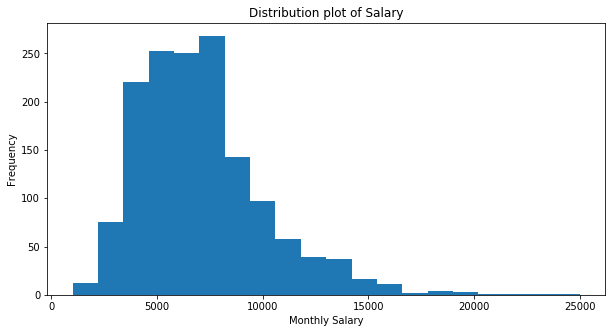

In [51]:
plt.figure(figsize=(10,5))
jobs['Avg_sal'].plot(kind='hist', bins=20, title='Distribution plot of Salary').set(xlabel='Monthly Salary')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

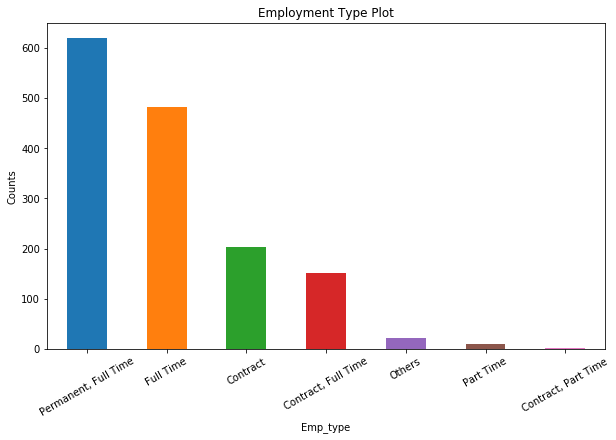

In [52]:
plt.figure(figsize=(10,6))
jobs.Emp_type.value_counts().plot(kind='bar', title='Employment Type Plot').set(xlabel='Emp_type', ylabel='Counts')
plt.xticks(rotation=30)

In [66]:
# combining all the job information into 1 column for NLP

jobs['all_info']= jobs['Company'].astype(str) + ' ' + jobs.Title.astype(str) + ' ' + jobs.Emp_type.astype(str) + ' ' \
    + jobs.Seniority.astype(str) + ' ' + jobs.Industry.astype(str) + ' ' + jobs.Responsibility.astype(str) + ' ' + jobs.Requirements.astype(str)

In [71]:
jobs.reset_index(inplace=True)
jobs.drop('index', axis=1, inplace=True)

## Getting the scores

In [554]:
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.svm import SVC
import string
from itertools import cycle
from xgboost import XGBClassifier

### Preparing for NLP

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction import stop_words

stopwords_sk = stop_words.ENGLISH_STOP_WORDS  #from sklearn
# stopwords_nltk = stopwords.words('english')  #from nltk

In [567]:
# adding additional stopwords for our analysis later
additional_words = ['Roles', 'Responsibilities', 'Requirements', 'RequirementsRequirements', 'Qualifications', 'Roles & ResponsibilitiesRole'
                   'Roles & ResponsibilitiesResponsibilities', 'requirement', 'minimum', 'Singapore', 'singapore',
                   'ltd', 'limited', 'pte', 'private', 'hub', 'dm', 'etl', 'large', 'able', 'react', 'axa', 'lc',
                    'phone', 'hana', 'technical', 'goal', 'pi', 'site', 'sp', 'pwm']

stopwords_sk = stopwords_sk.union(additional_words)

In [568]:
X = jobs.all_info

y = jobs['sal_cat']

In [569]:
# lemmatizing X

lemma = WordNetLemmatizer()
stemmer = PorterStemmer()

X_temp = []
for i in range (0,len(X)):
    col = re.sub('[^a-zA-Z]', ' ', X[i])
    col = col.lower()
    col = col.split()
    col = [lemma.lemmatize(word) for word in col if not word in set(stopwords_sk)]
    col = ' '.join(col)
    X_temp.append(col)

X = X_temp

In [570]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [571]:
# checking for imbalance dataset

print ('Train set: \n', y_train.value_counts() / len(y_train) * 100, '\n')
print ('----------------------------------\n')
print ('Test Set: \n', y_test.value_counts() / len(y_test) * 100)

Train set: 
 very high salary    34.060403
very low salary     33.976510
high salary         21.057047
low salary          10.906040
Name: sal_cat, dtype: float64 

----------------------------------

Test Set: 
 very low salary     43.478261
very high salary    27.759197
high salary         19.732441
low salary           9.030100
Name: sal_cat, dtype: float64


In [572]:
# TFIDF Vectorizer
tfidf = TfidfVectorizer(stop_words=stopwords_sk, ngram_range=(1,2), min_df=3)
Xtf_train = tfidf.fit_transform(X_train)
Xtf_test = tfidf.transform(X_test)

# ------------------------------------------------------------------------- #

# CountVectorizer
cvec = CountVectorizer(stop_words=stopwords_sk, ngram_range=(1,2), min_df=3)
Xcv_train = cvec.fit_transform(X_train)
Xcv_test = cvec.transform(X_test)

### KNN

In [573]:
# KNN TFIDF vectorizer
knn = KNeighborsClassifier()
cross_val_knntf = cross_val_score(knn, Xtf_train, y_train, cv=5)

print ('Cross Val Score: ', np.mean(cross_val_knntf))


knn.fit(Xtf_train, y_train)

pred_knntf = knn.predict(Xtf_test)

Cross Val Score:  0.46733193277310925


In [574]:
print ('Score: ', knn.score(Xtf_test, y_test), '\n')
print ('Classification Report: \n', classification_report(y_test, pred_knntf))

Score:  0.46488294314381273 

Classification Report: 
                   precision    recall  f1-score   support

     high salary       0.30      0.36      0.32        59
      low salary       0.15      0.15      0.15        27
very high salary       0.45      0.54      0.49        83
 very low salary       0.68      0.53      0.60       130

     avg / total       0.49      0.46      0.47       299



In [575]:
# KNN CVEC
knn = KNeighborsClassifier()
cross_val_knncv = cross_val_score(knn, Xcv_train, y_train, cv=5)

print ('Cross Val Score: ', np.mean(cross_val_knncv))


knn.fit(Xcv_train, y_train)

pred_knncv = knn.predict(Xcv_test)

Cross Val Score:  0.4337675070028011


In [576]:
print ('Score: ', knn.score(Xcv_test, y_test), '\n')
print ('Classification Report: \n', classification_report(y_test, pred_knncv))

Score:  0.45819397993311034 

Classification Report: 
                   precision    recall  f1-score   support

     high salary       0.23      0.42      0.30        59
      low salary       0.25      0.15      0.19        27
very high salary       0.50      0.22      0.30        83
 very low salary       0.65      0.69      0.67       130

     avg / total       0.49      0.46      0.45       299



### LogisticRegression GridSearch for TFIDFVectorizer

In [577]:
lr = LogisticRegression(class_weight='balanced')

param = {'C': [0.001, 0.01, 1, 5, 10]    
}

grid_lrtf = GridSearchCV(lr, param, verbose=1, cv=5, n_jobs=4)

grid_lrtf.fit(Xtf_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    6.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'C': [0.001, 0.01, 1, 5, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=1)

In [578]:
print ('Score: ', grid_lrtf.score(Xtf_test, y_test), '\n')
print ('--' *30, '\n')
print ('Best params: ', grid_lrtf.best_params_, '\n')
# print ('--' *30, '\n')
# model_grid_lrtf = grid_lrtf.best_estimator_
# print ('Best est score: ', model_grid_lrtf.score(Xtf_test, y_test), '\n')
print ('--' *30, '\n')
print ('Classification Report: \n', classification_report(y_test, grid_lrtf.predict(Xtf_test)))

Score:  0.6120401337792643 

------------------------------------------------------------ 

Best params:  {'C': 5} 

------------------------------------------------------------ 

Classification Report: 
                   precision    recall  f1-score   support

     high salary       0.47      0.37      0.42        59
      low salary       0.24      0.19      0.21        27
very high salary       0.55      0.71      0.62        83
 very low salary       0.78      0.75      0.76       130

     avg / total       0.61      0.61      0.61       299



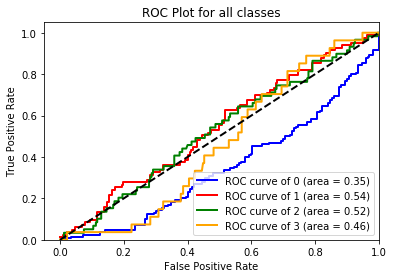

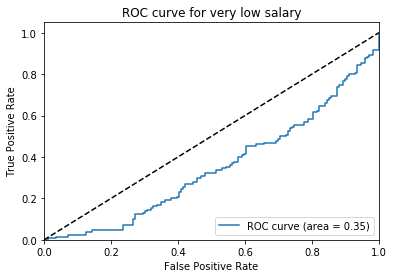

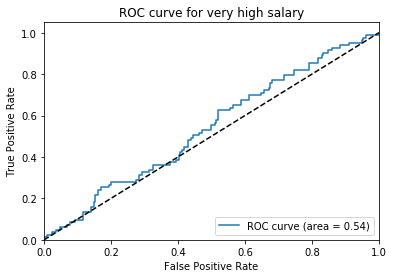

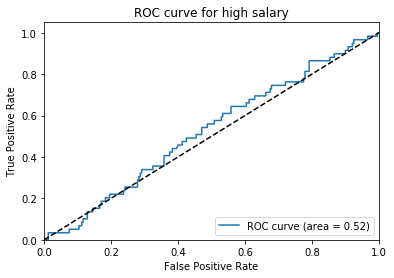

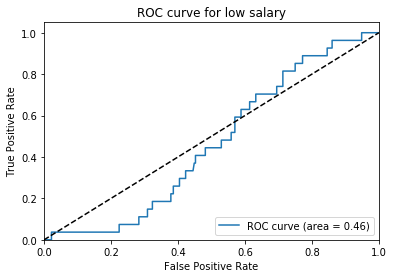

In [579]:
# getting the target categories out
cat = y_test.value_counts().keys().values


y_score = grid_lrtf.predict_proba(Xtf_test)
y_test_roc = label_binarize(y_test, classes=cat)

# Computing ROC for each class in 1 plot
lw=2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(cat)):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green', 'orange'])
for i, color in zip(range(len(cat)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

# setup for plot
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Plot for all classes')
plt.legend(loc="lower right")
plt.show()


# Plot of a ROC curve for a specific class
for i in range(len(cat)):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for ' + str(cat[i]))
    plt.legend(loc="lower right")
    plt.show()

In [580]:
grid_lrtf_0 = pd.DataFrame({'feature':tfidf.get_feature_names(),
                            'Very Low':grid_lrtf.best_estimator_.coef_[0]})
grid_lrtf_1 = pd.DataFrame({'feature':tfidf.get_feature_names(),
                         'Very High':grid_lrtf.best_estimator_.coef_[1]})
grid_lrtf_2 = pd.DataFrame({'feature':tfidf.get_feature_names(),
                         'High':grid_lrtf.best_estimator_.coef_[2]})
grid_lrtf_3 = pd.DataFrame({'feature':tfidf.get_feature_names(),
                         'Low':grid_lrtf.best_estimator_.coef_[3]})

grid_lrtf_0.sort_values('Very Low', inplace=True, ascending=False)
grid_lrtf_1.sort_values('Very High', inplace=True, ascending=False)
grid_lrtf_2.sort_values('High', inplace=True, ascending=False)
grid_lrtf_3.sort_values('Low', inplace=True, ascending=False)

In [581]:
grid_lrtf_0.head(10)

,feature,Very Low
7809,experience,1.895499
8159,expertise,1.815925
21108,technology,1.788039
18491,scientist,1.684816
16160,professional information,1.665764
21547,time professional,1.592574
6676,ecommerce,1.544470
23283,year experience,1.487978
7183,enhancement,1.446245
13949,nlp,1.425820


In [582]:
grid_lrtf_1.head(10)

,feature,Very High
12790,manufacturing,2.479303
18347,sap,2.437711
4929,dashboard,2.349234
5195,database,2.043783
8916,functional,2.031752
17901,responsible,1.909967
15997,processing,1.796164
1108,analyze,1.772493
4093,conduct,1.737535
1674,associate,1.696811


In [583]:
grid_lrtf_2.head(10)

,feature,High
11656,lead,3.959233
1986,banking,3.645290
12659,manager,2.682818
18714,senior,2.307279
20813,team,2.186886
12448,management,2.141708
21738,trading,2.021812
14441,organization,1.960131
2510,business,1.884161
11709,leader,1.667217


In [584]:
grid_lrtf_3.head(10)

,feature,Low
7722,executive,3.518258
7360,entry,2.149840
16198,proficient,2.043939
21537,time executive,1.973260
11280,junior executive,1.914721
7428,equipment,1.908538
6223,diploma,1.696421
11278,junior,1.695660
4951,data analyst,1.692428
1648,assist,1.667445


### Random Forest GridSearch for TFIDFVectorizer

In [585]:
rfc = RandomForestClassifier(class_weight='balanced')

param = {'n_estimators': [10, 15, 20, 30, 35, 40, 45],
}

grid_rfctf = GridSearchCV(rfc, param, verbose=1, cv=10, n_jobs=4)

grid_rfctf.fit(Xtf_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   18.9s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:   38.5s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'n_estimators': [10, 15, 20, 30, 35, 40, 45]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [586]:
print ('Score: ', grid_rfctf.score(Xtf_test, y_test), '\n')
print ('--' *30, '\n')
print ('Best params: ', grid_rfctf.best_params_, '\n')
# print ('--' *30, '\n')
# model_grid_lrtf = grid_lrtf.best_estimator_
# print ('Best est score: ', model_grid_lrtf.score(Xtf_test, y_test), '\n')
print ('--' *30, '\n')
print ('Classification Report: \n', classification_report(y_test, grid_rfctf.predict(Xtf_test)))

Score:  0.5852842809364549 

------------------------------------------------------------ 

Best params:  {'n_estimators': 35} 

------------------------------------------------------------ 

Classification Report: 
                   precision    recall  f1-score   support

     high salary       0.43      0.25      0.32        59
      low salary       0.38      0.11      0.17        27
very high salary       0.50      0.76      0.60        83
 very low salary       0.73      0.72      0.73       130

     avg / total       0.57      0.59      0.56       299



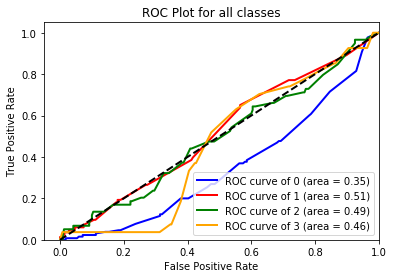

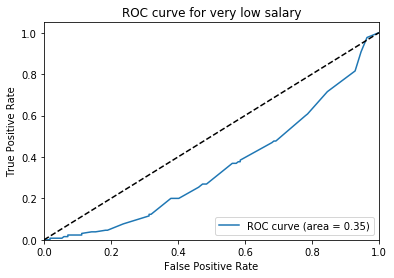

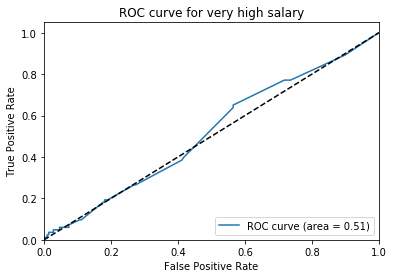

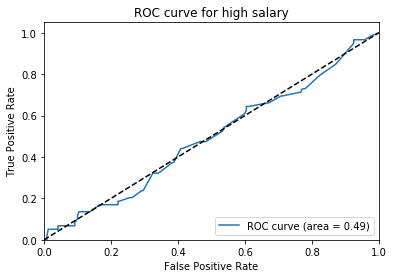

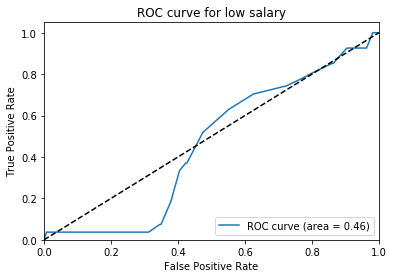

In [587]:
# getting the target categories out
cat = y_test.value_counts().keys().values


y_score = grid_rfctf.predict_proba(Xtf_test)
y_test_roc = label_binarize(y_test, classes=cat)

# Computing ROC for each class in 1 plot
lw=2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(cat)):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green', 'orange'])
for i, color in zip(range(len(cat)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

# setup for plot
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Plot for all classes')
plt.legend(loc="lower right")
plt.show()


# Plot of a ROC curve for a specific class
for i in range(len(cat)):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for ' + str(cat[i]))
    plt.legend(loc="lower right")
    plt.show()

In [588]:
grid_rfctf_0 = pd.DataFrame({'feature':tfidf.get_feature_names(),
                            'value':grid_rfctf.best_estimator_.feature_importances_})
grid_rfctf_0.sort_values('value', ascending=False).head(10)

,feature,value
11656,lead,0.005812
7722,executive,0.004563
2510,business,0.004132
20813,team,0.003868
12659,manager,0.003329
7809,experience,0.003154
10506,information technology,0.003089
1986,banking,0.002753
3754,communication,0.002690
22899,work,0.002597


### SGD Classifier GridSearch for TFIDFVectorizer

In [589]:
sgc = SGDClassifier(class_weight='balanced', max_iter=10)

param = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10], 
        'penalty': ['elasticnet', 'l1', 'l2'],
        'loss': ['hinge', 'log']
}

grid_sgctf = GridSearchCV(sgc, param, verbose=1, cv=10, n_jobs=4)

grid_sgctf.fit(Xtf_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   15.4s
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:   24.2s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=10, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'penalty': ['elasticnet', 'l1', 'l2'], 'loss': ['hinge', 'log']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [590]:
print ('Score: ', grid_sgctf.score(Xtf_test, y_test), '\n')
print ('--' *30, '\n')
print ('Best params: ', grid_sgctf.best_params_, '\n')
# print ('--' *30, '\n')
# model_grid_lrtf = grid_lrtf.best_estimator_
# print ('Best est score: ', model_grid_lrtf.score(Xtf_test, y_test), '\n')
print ('--' *30, '\n')
print ('Classification Report: \n', classification_report(y_test, grid_sgctf.predict(Xtf_test)))

Score:  0.5953177257525084 

------------------------------------------------------------ 

Best params:  {'alpha': 0.0001, 'loss': 'log', 'penalty': 'elasticnet'} 

------------------------------------------------------------ 

Classification Report: 
                   precision    recall  f1-score   support

     high salary       0.41      0.36      0.38        59
      low salary       0.21      0.15      0.17        27
very high salary       0.55      0.72      0.62        83
 very low salary       0.78      0.72      0.74       130

     avg / total       0.59      0.60      0.59       299



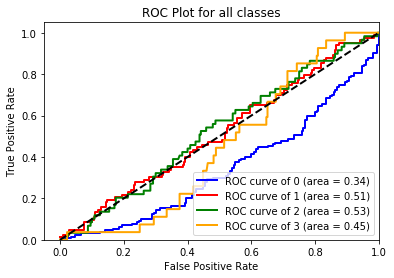

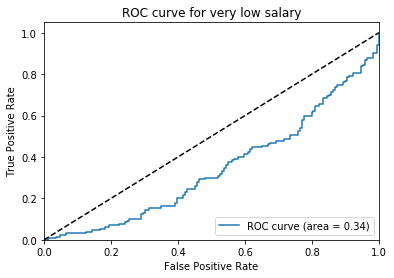

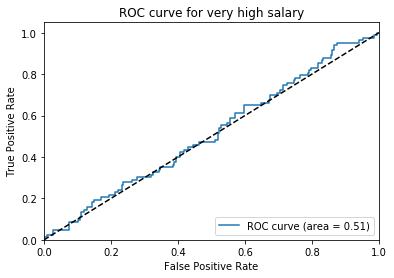

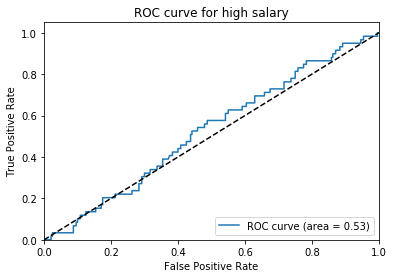

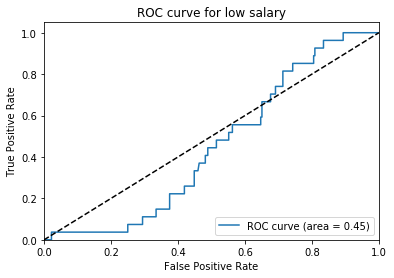

In [591]:
# getting the target categories out
cat = y_test.value_counts().keys().values


y_score = grid_sgctf.predict_proba(Xtf_test)
y_test_roc = label_binarize(y_test, classes=cat)

# Computing ROC for each class in 1 plot
lw=2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(cat)):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green', 'orange'])
for i, color in zip(range(len(cat)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

# setup for plot
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Plot for all classes')
plt.legend(loc="lower right")
plt.show()


# Plot of a ROC curve for a specific class
for i in range(len(cat)):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for ' + str(cat[i]))
    plt.legend(loc="lower right")
    plt.show()

In [592]:
grid_sgctf_0 = pd.DataFrame({'feature':tfidf.get_feature_names(),
                            'Very Low':grid_sgctf.best_estimator_.coef_[0]})
grid_sgctf_1 = pd.DataFrame({'feature':tfidf.get_feature_names(),
                         'Very High':grid_sgctf.best_estimator_.coef_[1]})
grid_sgctf_2 = pd.DataFrame({'feature':tfidf.get_feature_names(),
                         'High':grid_sgctf.best_estimator_.coef_[2]})
grid_sgctf_3 = pd.DataFrame({'feature':tfidf.get_feature_names(),
                         'Low':grid_sgctf.best_estimator_.coef_[3]})

grid_sgctf_0.sort_values('Very Low', inplace=True, ascending=False)
grid_sgctf_1.sort_values('Very High', inplace=True, ascending=False)
grid_sgctf_2.sort_values('High', inplace=True, ascending=False)
grid_sgctf_3.sort_values('Low', inplace=True, ascending=False)

In [593]:
grid_sgctf_0.head(10)

,feature,Very Low
8159,expertise,2.704931
18491,scientist,2.607310
21108,technology,2.351435
6676,ecommerce,2.304048
16160,professional information,2.232330
7183,enhancement,2.210918
10596,innovation,2.184851
17803,researcher,2.150803
13949,nlp,2.135706
21547,time professional,2.105911


In [594]:
grid_sgctf_1.head(10)

,feature,Very High
12790,manufacturing,3.693952
4929,dashboard,3.564705
8916,functional,2.999992
5195,database,2.705515
1674,associate,2.704100
17901,responsible,2.686277
18347,sap,2.678776
1108,analyze,2.540918
4093,conduct,2.509420
21078,technician,2.491818


In [595]:
grid_sgctf_2.head(10)

,feature,High
11656,lead,5.782727
1986,banking,4.946459
12659,manager,3.489131
18714,senior,3.194874
14441,organization,3.036694
21738,trading,2.976615
20813,team,2.555966
11709,leader,2.321514
6260,director,2.265784
12448,management,2.202675


In [596]:
grid_sgctf_3.head(10)

,feature,Low
7722,executive,5.228537
16198,proficient,3.147314
21537,time executive,2.925813
11280,junior executive,2.848566
7360,entry,2.832006
7428,equipment,2.632983
11278,junior,2.524858
4951,data analyst,2.510037
1648,assist,2.489734
6223,diploma,2.400563


### XGBoosting

In [319]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic',
                   silent=True, nthread=1)

param = {'min_child_weight': [1, 5, 10],
       'gamma': [0.5, 1, 1.5],
       'subsample': [0.8, 1.0],
       'colsample_bytree': [0.8, 1.0],
       'max_depth': [4, 5]
       }

grid_xgbtf = GridSearchCV(xgb, param, verbose=1, cv=5, n_jobs=4)

grid_xgbtf.fit(Xtf_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  6.4min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 29.1min
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed: 60.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'min_child_weight': [1, 5, 10], 'gamma': [0.5, 1, 1.5], 'subsample': [0.8, 1.0], 'colsample_bytree': [0.8, 1.0], 'max_depth': [4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [320]:
print ('Score: ', grid_xgbtf.score(Xtf_test, y_test), '\n')
print ('--' *30, '\n')
print ('Best params: ', grid_xgbtf.best_params_, '\n')
# print ('--' *30, '\n')
# model_grid_lrtf = grid_lrtf.best_estimator_
# print ('Best est score: ', model_grid_lrtf.score(Xtf_test, y_test), '\n')
print ('--' *30, '\n')
print ('Classification Report: \n', classification_report(y_test, grid_xgbtf.predict(Xtf_test)))

Score:  0.6287625418060201 

------------------------------------------------------------ 

Best params:  {'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 1.0} 

------------------------------------------------------------ 

Classification Report: 
                   precision    recall  f1-score   support

     high salary       0.50      0.31      0.38        59
      low salary       0.00      0.00      0.00        27
very high salary       0.55      0.76      0.64        83
 very low salary       0.73      0.82      0.78       130

     avg / total       0.57      0.63      0.59       299



C:\Users\Arsyad\Anaconda2\envs\Python_3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Arsyad\Anaconda2\envs\Python_3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Question 2

## Preparing dataset for Q2

In [602]:
jobs1 = jobs.copy()

In [603]:
# if data_scientist == 1, else == 0

jobs1['data_scientist'] = jobs1.Title.apply(lambda x: str(x))

jobs1['data_scientist'] = jobs1.data_scientist.apply(lambda x: 1 if 'data scientist' in x.lower() or 'data science' in x.lower() or 'scientist' in x.lower() or 'science' in x.lower() else 0)

In [604]:
jobs1.data_scientist.value_counts()

# there is class imbalance, but we can use random forest with class_weight="balanced"

0    1365
1     126
Name: data_scientist, dtype: int64

In [605]:
jobs1['all_info_q2']= jobs1['Company'].astype(str) + ' ' + jobs1.Emp_type.astype(str) + ' ' \
    + jobs1.Seniority.astype(str) + ' ' + jobs1.Industry.astype(str) + ' ' + jobs1.Responsibility.astype(str) + ' ' + jobs1.Requirements.astype(str)

In [606]:
X_q2 = jobs1['all_info_q2']
y_q2 = jobs1.data_scientist

In [607]:
# lemmatizing X

lemma = WordNetLemmatizer()
stemmer = PorterStemmer()

X_temp_q2 = []
for i in range (0,len(X_q2)):
    col = re.sub('[^a-zA-Z]', ' ', X_q2[i])
    col = col.lower()
    col = col.split()
    col = [lemma.lemmatize(word) for word in col if not word in set(stopwords_sk)]
    col = ' '.join(col)
    X_temp_q2.append(col)

X_q2 = X_temp_q2

In [608]:
X_train_q2, X_test_q2, y_train_q2, y_test_q2 = train_test_split(X_q2, y_q2, test_size=0.3, random_state=42)

# check the shape of train and test set
print (len(X_train_q2))
print (len(X_test_q2))
print (len(y_train_q2))
print (len(y_test_q2))

1043
448
1043
448


In [609]:
temp_train_df = pd.DataFrame({'all_info_q2': X_train_q2,
                       'data_scientist': y_train_q2})

temp_train_df.reset_index(inplace=True, drop=('index'))


temp_test_df = pd.DataFrame({'all_info_q2': X_test_q2,
                            'data_scientist': y_test_q2})

temp_test_df.reset_index(inplace=True, drop=('index'))

In [610]:
temp_train_df.data_scientist.value_counts()

0    959
1     84
Name: data_scientist, dtype: int64

In [611]:
temp_test_df.data_scientist.value_counts()

0    406
1     42
Name: data_scientist, dtype: int64

An upsample on the train set is required due to the class imbalance.

In [612]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = temp_train_df[temp_train_df.data_scientist == 0]
df_minority = temp_train_df[temp_train_df.data_scientist == 1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=959,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
jobs1_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
jobs1_upsampled.data_scientist.value_counts()

1    959
0    959
Name: data_scientist, dtype: int64

In [613]:
X_train_q2_up = jobs1_upsampled['all_info_q2']
y_train_q2_up = jobs1_upsampled.data_scientist

In [614]:
tfidf_q2 = TfidfVectorizer(stop_words=stopwords_sk, ngram_range=(1,2), min_df=3)
Xtf_train_q2 = tfidf_q2.fit_transform(X_train_q2_up)
Xtf_test_q2 = tfidf_q2.transform(X_test_q2)

# ------------------------------------------------------------------------- #

cvec_q2 = CountVectorizer(stop_words=stopwords_sk, ngram_range=(1,2), min_df=3)
Xcv_train_q2 = cvec_q2.fit_transform(X_train_q2_up)
Xcv_test_q2 = cvec_q2.transform(X_test_q2)

# ------------------------------------------------------------------------ #

y_train_q2 = y_train_q2_up

## Getting the scores

### AUC plot function

In [615]:
#write function to get model performance
def model_performance(model, X_train_q2, y_train_q2, X_test_q2, y_test_q2):
#     model.fit(X_train_q2, y_train_q2)
    Y_pp = pd.DataFrame(model.predict_proba(X_test_q2), columns=['class_0_pp','class_1_pp'])
    #roc, auc for model for common performance measurement
    
    from sklearn.metrics import roc_curve, auc
    
    # For class 1, find the area under the curve.
    fpr, tpr, _ = roc_curve(y_test_q2, Y_pp.class_1_pp)
    roc_auc = auc(fpr, tpr)
    
    # Plot of a ROC curve.
    plt.figure(figsize=[4,4])
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([-0.05, 1.0])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('Receiver operating characteristic for 1', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()
    print ('auc:',roc_auc)
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn import metrics
    
    #fit and predict
#     class_fit = model.fit(X_train_q2, y_train_q2)
    class_pred = model.predict(X_test_q2)
    
    #confusion matrix and f1-score
    conmat = np.array(confusion_matrix(y_test_q2, class_pred))
    confusion = pd.DataFrame(conmat, index=[0,1], columns=['predicted_0','predicted_1'])
    f1_score = metrics.f1_score(y_test_q2, class_pred, average='weighted')
    precision_score = metrics.precision_score(y_test_q2, class_pred, average='weighted')
    print ('--'*30)
    print ('Confusion Table:')
    print (confusion)
    print ('--'*30)
    print ('Classification Report:')
    print (classification_report(y_test_q2, class_pred))
    print ('--'*30)
    print ('auc:',roc_auc)
    print ('f1:',f1_score)
    print ('precision:',precision_score)
#     return roc_auc, f1_score, precision_score

### Random Forest GridSearch for TFIDFVectorizer

In [616]:
rfc = RandomForestClassifier()

param = {'n_estimators': [10, 15, 20, 30, 35, 40, 45],
         'min_samples_split': [2,5,7],
         'min_samples_leaf': [1,3,5,7]
}

grid_rfctf = GridSearchCV(rfc, param, verbose=1, cv=10, n_jobs=4)

grid_rfctf.fit(Xtf_train_q2, y_train_q2)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   44.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 840 out of 840 | elapsed:  2.1min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'n_estimators': [10, 15, 20, 30, 35, 40, 45], 'min_samples_split': [2, 5, 7], 'min_samples_leaf': [1, 3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

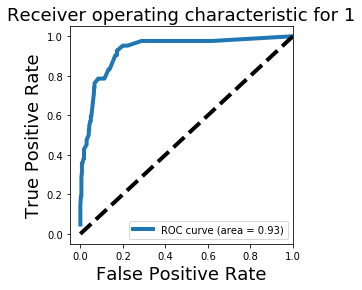

auc: 0.9292165141918838
------------------------------------------------------------
Confusion Table:
   predicted_0  predicted_1
0          402            4
1           27           15
------------------------------------------------------------
Classification Report:
             precision    recall  f1-score   support

          0       0.94      0.99      0.96       406
          1       0.79      0.36      0.49        42

avg / total       0.92      0.93      0.92       448

------------------------------------------------------------
auc: 0.9292165141918838
f1: 0.9187113477962108
precision: 0.9232264446080236


In [617]:
model_performance(grid_rfctf, Xtf_train_q2, y_train_q2, Xtf_test_q2, y_test_q2)

In [618]:
grid_rfctf_0 = pd.DataFrame({'feature':tfidf_q2.get_feature_names(),
                            'value':grid_rfctf.best_estimator_.feature_importances_})
grid_rfctf_0.sort_values('value', ascending=False).head(10)

,feature,value
13758,learning,0.048734
23607,statistic,0.030080
21753,science,0.018995
19722,python,0.016614
21852,scientist,0.016412
5888,data mining,0.013737
13505,language,0.013222
756,algorithm,0.008847
15156,mathematics,0.008788
13791,learning data,0.008269


### Logistic Regression GridSearch for TFIDFVectorizer

In [619]:
lr = LogisticRegression()

param = {'C': [0.001, 0.01, 1, 5, 10]    
}

grid_lrtf = GridSearchCV(lr, param, verbose=1, cv=10, n_jobs=4)

grid_lrtf.fit(Xtf_train_q2, y_train_q2)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    6.0s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'C': [0.001, 0.01, 1, 5, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=1)

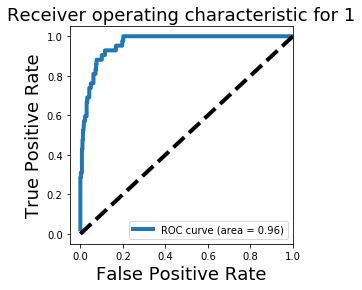

auc: 0.9638165611072015
------------------------------------------------------------
Confusion Table:
   predicted_0  predicted_1
0          394           12
1           16           26
------------------------------------------------------------
Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.97      0.97       406
          1       0.68      0.62      0.65        42

avg / total       0.94      0.94      0.94       448

------------------------------------------------------------
auc: 0.9638165611072015
f1: 0.9360906862745099
precision: 0.9350288831835687


In [620]:
model_performance(grid_lrtf, Xtf_train_q2, y_train_q2, Xtf_test_q2, y_test_q2)

In [621]:
grid_lrtf_0 = pd.DataFrame({'feature':tfidf_q2.get_feature_names(),
                            'value':grid_lrtf.best_estimator_.coef_[0]})

grid_lrtf_0.sort_values('value', ascending=False).head(10)

,feature,value
5721,data,4.657080
13758,learning,4.502143
15708,model,4.144685
14358,machine learning,3.969908
14356,machine,3.804516
5959,data science,3.706387
23645,statistical,3.416153
21852,scientist,3.020495
21753,science,2.910813
23607,statistic,2.687488
